In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as td
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [2]:
train_dir=r'D:\ml\Animal\data\train'
test_dir=r'D:\ml\Animal\data\test'
validation_data_dir=r'D:\ml\Animal\data\validation'

In [3]:
train_para=ImageDataGenerator(rescale=1./255,rotation_range=40,
                       width_shift_range=0.2,
                   height_shift_range=0.2,
                   shear_range=0.2,
                   zoom_range=0.2,
                   horizontal_flip=True,
    fill_mode='nearest')

In [4]:
train_generator=train_para.flow_from_directory(train_dir,
                                  target_size=(300,300),
                                  batch_size=50,
                                  class_mode='categorical',
                                  subset='training')


Found 13412 images belonging to 6 classes.


In [5]:
val_data = train_para.flow_from_directory(
         validation_data_dir,
         target_size=(300, 300),
         batch_size=50,
         class_mode='categorical',
         shuffle=False)

Found 2549 images belonging to 6 classes.


In [6]:
model=Sequential([
    Conv2D(32,(3,3), activation='relu', input_shape=(300,300,3)),
    MaxPooling2D((2,2)),

    Conv2D(64,(3,3), activation='relu', input_shape=(300,300,3)),
    MaxPooling2D((2,2)),

    Conv2D(128,(3,3), activation='relu', input_shape=(300,300,3)),
    MaxPooling2D((2,2)),

    Conv2D(128,(3,3), activation='relu', input_shape=(300,300,3)),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

In [7]:
early_stopping=EarlyStopping(monitor='val_loss', patience=5,verbose=2,restore_best_weights=True)

In [8]:
model.compile(

    optimizer=Adam(learning_rate=0.001),

    loss='categorical_crossentropy',

    metrics=['Accuracy']

)

In [9]:
history=model.fit(train_generator,
                 epochs=100,
                  batch_size=64,
                 validation_data=val_data,
                  callbacks=[early_stopping])

Epoch 1/100
269/269 [==============================] - 646s 2s/step - loss: 1.6042 - Accuracy: 0.3469 - val_loss: 1.3375 - val_Accuracy: 0.4845
Epoch 2/100
269/269 [==============================] - 615s 2s/step - loss: 1.2729 - Accuracy: 0.5194 - val_loss: 1.0661 - val_Accuracy: 0.6034
Epoch 3/100
269/269 [==============================] - 610s 2s/step - loss: 1.0687 - Accuracy: 0.6118 - val_loss: 0.9452 - val_Accuracy: 0.6548
Epoch 4/100
269/269 [==============================] - 606s 2s/step - loss: 0.9734 - Accuracy: 0.6439 - val_loss: 0.9467 - val_Accuracy: 0.6536
Epoch 5/100
269/269 [==============================] - 613s 2s/step - loss: 0.9045 - Accuracy: 0.6770 - val_loss: 0.8642 - val_Accuracy: 0.6881
Epoch 6/100
269/269 [==============================] - 612s 2s/step - loss: 0.8492 - Accuracy: 0.6988 - val_loss: 0.8523 - val_Accuracy: 0.6960
Epoch 7/100
269/269 [==============================] - 608s 2s/step - loss: 0.8111 - Accuracy: 0.7088 - val_loss: 0.7921 - val_Accuracy:

In [14]:
model.save(r'D:\ml\Animal\data\animal-classi.h5')

In [15]:
import numpy as np
def predict(model, img):
    img_array = tf.keras.utils.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])), 0)
    return predicted_class, confidence

1/1 [==============================] - 0s 48ms/step


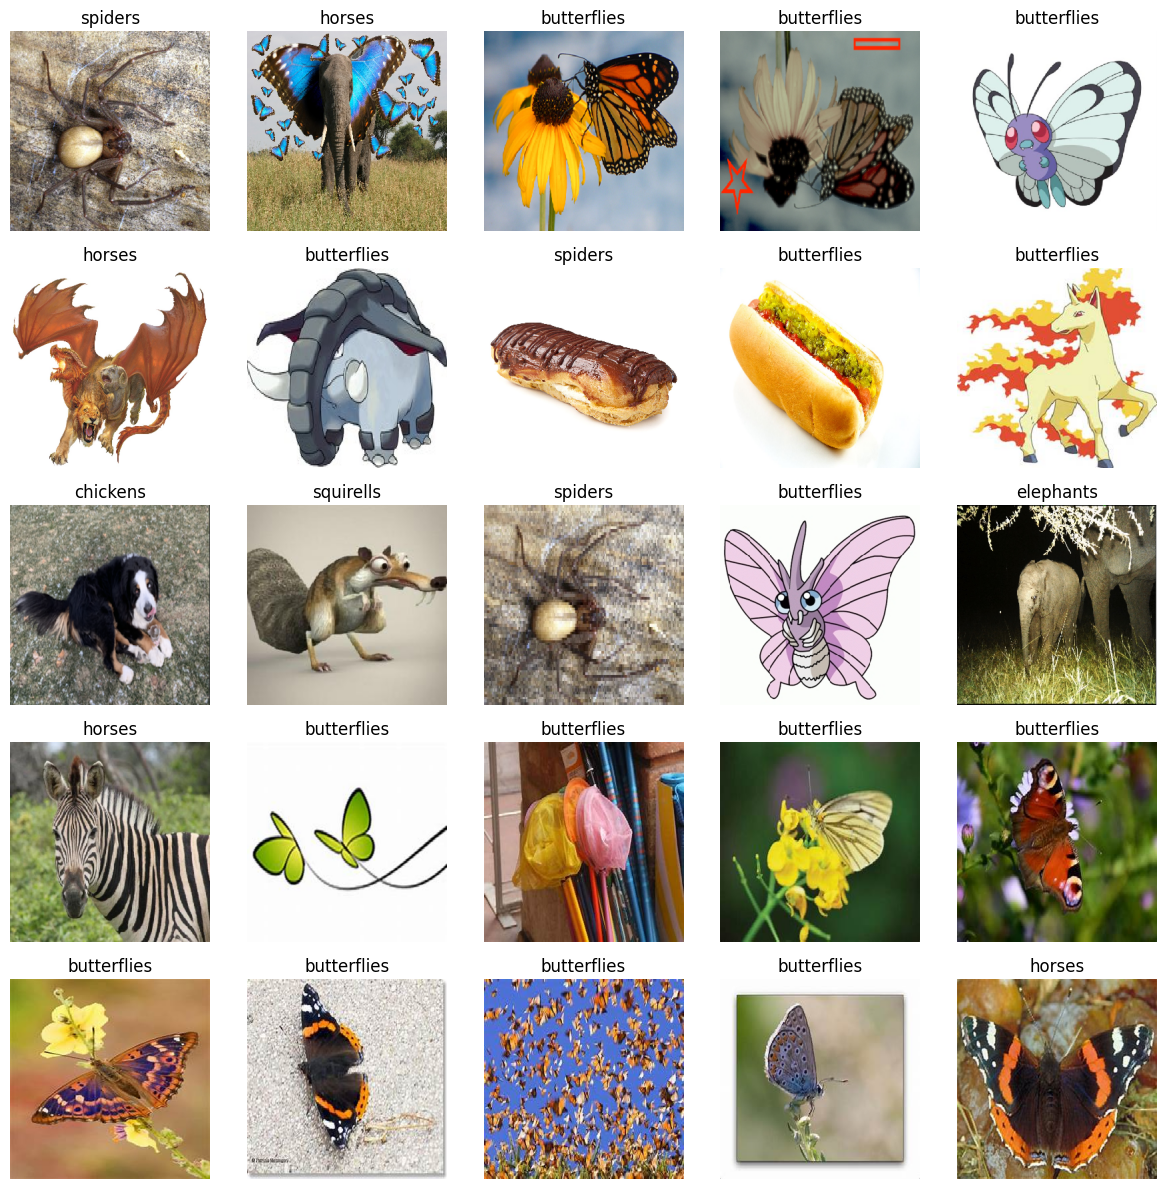

In [27]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import os
import matplotlib.pyplot as plt


model = tf.keras.models.load_model(r'D:\ml\Animal\data\animal-classi.h5')


class_labels = ['butterflies', 'chickens', 'elephants', 'horses','spiders','squirells']

def preprocess_image(image_path):
    img = load_img(image_path, target_size=(300, 300))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array
test_images_dir = r'D:\ml\Animal\data\test'
test_images = []
for root, _, files in os.walk(test_images_dir):
    for file in files:
        if file.endswith(('.jpg', '.jpeg', '.png')): 
            test_images.append(os.path.join(root, file))

plt.figure(figsize=(12, 12))
for i, image_path in enumerate(test_images[:25]):
    img_array = preprocess_image(image_path)
    prediction = model.predict(img_array)
    predicted_class = class_labels[np.argmax(prediction)]

    img = load_img(image_path, target_size=(300, 300))

    plt.subplot(5, 5, i + 1)
    plt.imshow(img)
    plt.title(predicted_class)
    plt.axis('off')

plt.tight_layout()
plt.show()
